In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
fake_job_postings = pd.read_csv('/content/drive/My Drive/BA476Team3/data/fake_job_postings_cleaned.csv')

In [ ]:
X = fake_job_postings[['telecommuting', 'ratio', 'text', 'character_count']]
y = fake_job_postings['fraudulent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [ ]:
X_train_num = X_train[['telecommuting', 'ratio', 'character_count']]
X_test_num = X_test[['telecommuting', 'ratio', 'character_count']]


In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train.text)
tfidf_test = tfidf_vectorizer.transform(X_test.text)

In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)


0.971395881006865

In [ ]:
metrics.f1_score(y_test, pred)

0.7435897435897436

In [ ]:
from sklearn.linear_model import SGDClassifier

# lasso logistic regression 
clf_log = SGDClassifier(loss='log', penalty='l2', alpha=0.001).fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

0.9788329519450801

In [ ]:
clf_num = SGDClassifier(loss='log', penalty='l2', alpha=0.001).fit(X_train_num, y_train)
pred_num = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)

0.06607551487414187

In [ ]:
prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)

In [ ]:
metrics.accuracy_score(y_test, prediction_array)

0.06607551487414187

In [ ]:
metrics.f1_score(y_test, prediction_array)

0.12396028977730077

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction_array)

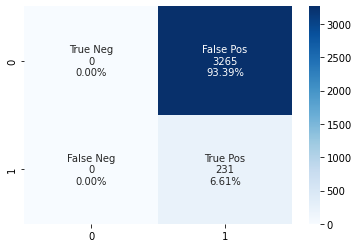

In [ ]:
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [ ]:
# ridge regression
clf_log = SGDClassifier(loss='log', penalty='l1', alpha=0.001).fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

0.959096109839817

In [ ]:
clf_num = SGDClassifier(loss='log', penalty='l1', alpha=0.001).fit(X_train_num, y_train)
pred_num = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)

0.937070938215103

In [ ]:
prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)

In [ ]:
metrics.accuracy_score(y_test, prediction_array)

0.9579519450800915

In [ ]:
metrics.f1_score(y_test, prediction_array)

0.6878980891719745

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction_array)

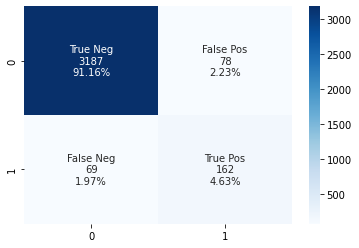

In [ ]:
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [ ]:
# elastic net
clf_log = SGDClassifier(loss='log', penalty='elasticnet', alpha=0.001).fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

0.9691075514874142

In [ ]:
clf_num = SGDClassifier(loss='log', penalty='elasticnet', alpha=0.001).fit(X_train_num, y_train)
pred_num = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)

0.9339244851258581

In [ ]:
prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)

In [ ]:
metrics.accuracy_score(y_test, prediction_array)

0.9691075514874142

In [ ]:
metrics.f1_score(y_test, prediction_array)

0.7578475336322871

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction_array)

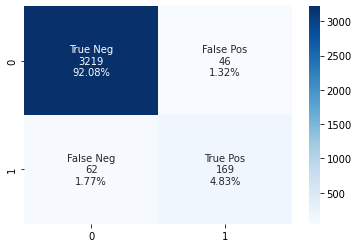

In [ ]:
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [ ]:
len(y_test[y_test == 0]), len(y_test[y_test == 1])

(3265, 231)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error

mean_acc = np.zeros(20)
f1_cc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(count_train,y_train)
    yhat= knn.predict(count_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
    f1_cc[i-1] = metrics.f1_score(y_test, yhat)

print(f1_cc)
print(mean_acc)


[0.6875     0.71706263 0.64335664 0.67659574 0.63099631 0.67982456
 0.65873016 0.68008949 0.66388309 0.63888889 0.62845011 0.59605911
 0.59496568 0.56650246 0.56074766 0.53101737 0.52278177 0.50253807
 0.50490196 0.47792208]
[0.951373   0.9625286  0.9416476  0.95652174 0.94279176 0.95823799
 0.95080092 0.95909611 0.95394737 0.95537757 0.94994279 0.95308924
 0.94937071 0.94965675 0.94622426 0.94593822 0.9430778  0.94393593
 0.94221968 0.94250572]


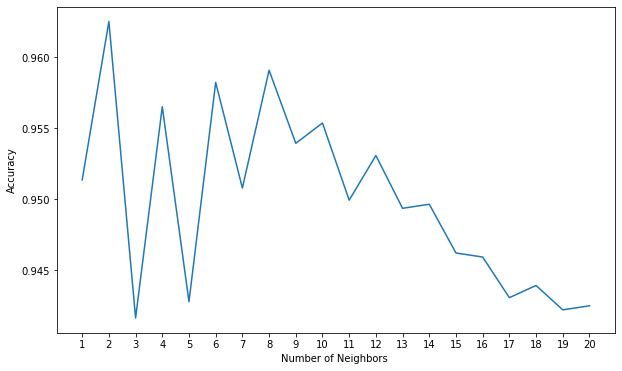

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
mean_acc_num = np.zeros(20)
f1_cc_num = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_num,y_train)
    yhat_num= knn.predict(X_test_num)
    mean_acc_num[i-1] = metrics.accuracy_score(y_test, yhat_num)
    f1_cc_num[i-1] = metrics.f1_score(y_test, yhat_num)

print(f1_cc_num)
print(mean_acc_num)

[0.25522042 0.17777778 0.26415094 0.19708029 0.24749164 0.18113208
 0.21993127 0.17910448 0.20216606 0.17977528 0.21014493 0.17977528
 0.21090909 0.18113208 0.19259259 0.15444015 0.17358491 0.15267176
 0.15909091 0.15969582]
[0.90818078 0.93649886 0.93306636 0.93707094 0.93564073 0.93792906
 0.93506865 0.93707094 0.9367849  0.93735698 0.93764302 0.93735698
 0.93792906 0.93792906 0.93764302 0.93735698 0.93735698 0.93649886
 0.93649886 0.9367849 ]


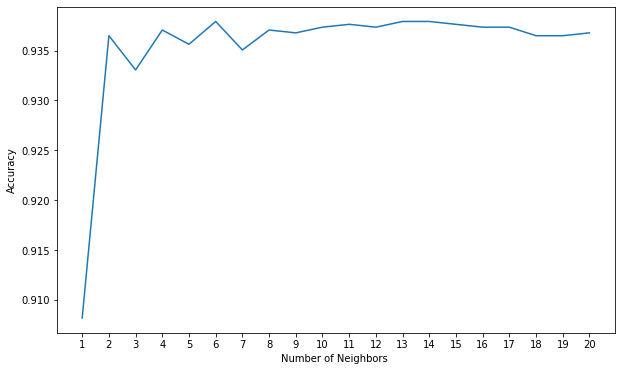

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc_num)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor(n_neighbors=2).fit(count_train, y_train)   
y_test_predictions_KNN_text = model.predict(count_test)
print(y_test_predictions_KNN_text)
y_test_predictions_KNN_text = [0 if x <= 0.5 else 1 for x in y_test_predictions_KNN_text]

#print("RMSE on testing set = ", mean_squared_error(y_test, y_test_predictions.round(0)))
print(model.score(count_train, y_train))
print(model.score(count_test, y_test))
# print(y_test)
# print(y_test_predictions)
print(metrics.accuracy_score(y_test, y_test_predictions_KNN_text))
print(metrics.f1_score(y_test, y_test_predictions_KNN_text))

[0. 0. 0. ... 0. 0. 0.]
0.8335560575152626
0.2792134868704549
0.9625286041189931
0.717062634989201


In [ ]:
model = KNeighborsRegressor(n_neighbors=6).fit(X_train_num, y_train)   
y_test_predictions_KNN_num = model.predict(X_test_num)
print(y_test_predictions_KNN_num)
y_test_predictions_KNN_num = [0 if x <= 0.5 else 1 for x in y_test_predictions_KNN_num]
print(metrics.accuracy_score(y_test, y_test_predictions_KNN_num))
print(metrics.f1_score(y_test, y_test_predictions_KNN_num))

[0.16666667 0.         0.         ... 0.         0.         0.        ]
0.937929061784897
0.1811320754716981


In [ ]:
# Stacking KNN models
prediction_array_KNN = []

for i, j in zip(y_test_predictions_KNN_num, y_test_predictions_KNN_text):
    if i == 0 and j == 0:
        prediction_array_KNN.append(0)
    else:
        prediction_array_KNN.append(1)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_array_KNN))
print("F1:",metrics.f1_score(y_test, prediction_array_KNN))

Accuracy: 0.9596681922196796
F1: 0.7019027484143763


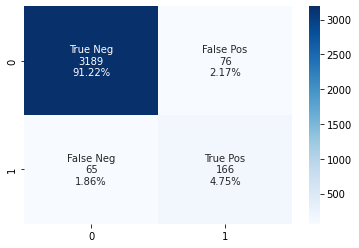

In [ ]:
cf_matrix_knn = confusion_matrix(y_test, prediction_array_KNN)

group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix_knn.flatten()/np.sum(cf_matrix_knn)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_knn, annot=labels, fmt='', cmap='Blues');

In [ ]:
from sklearn import tree



In [ ]:
from sklearn.model_selection import cross_val_score

def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = tree.DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(count_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

print(sm_cv_scores_mean)

In [ ]:

sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train_num, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')
print(sm_cv_scores_mean)

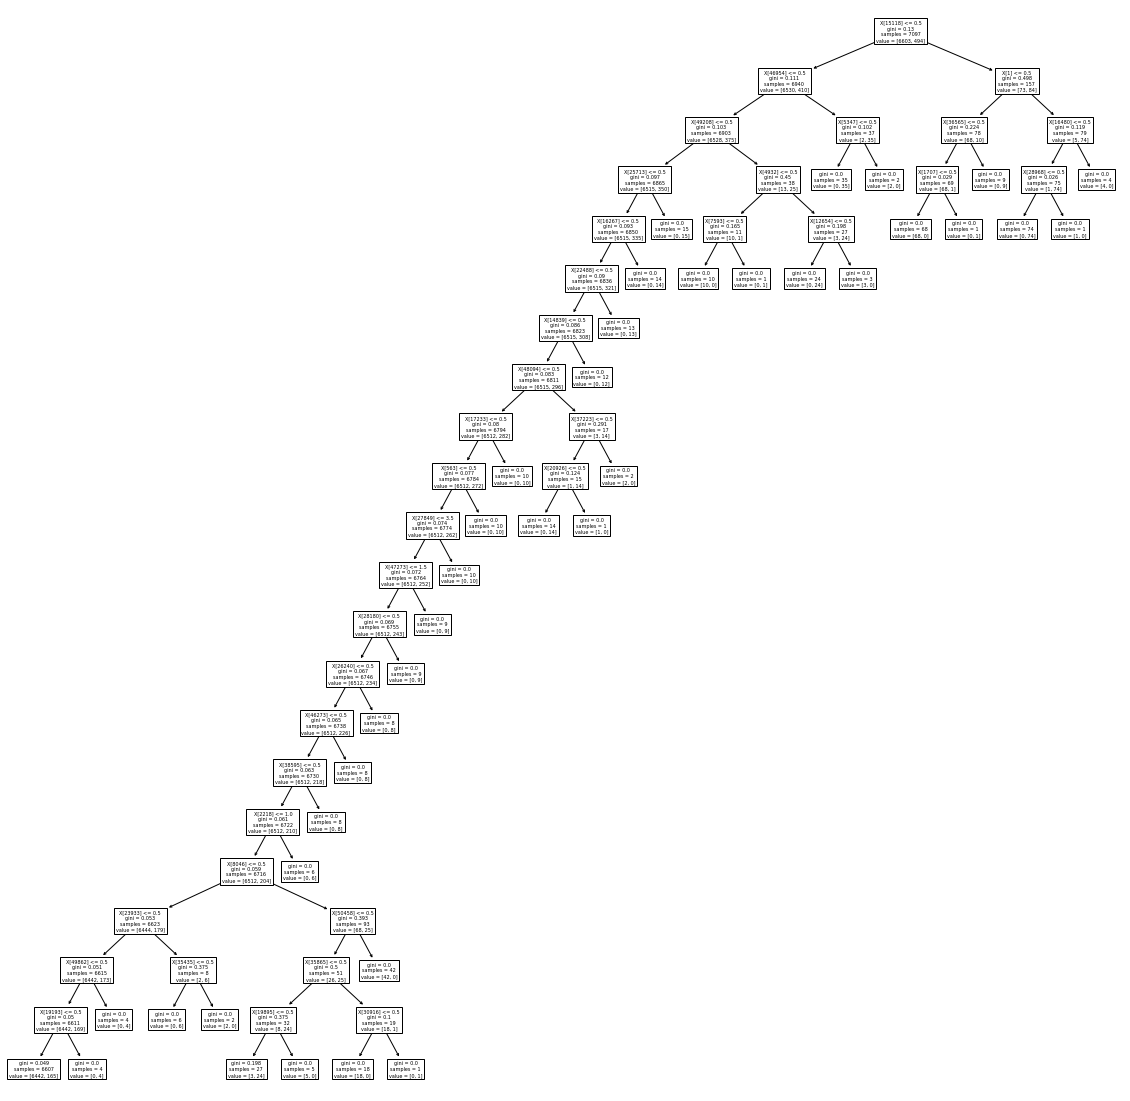

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth= 21).fit(count_train, y_train)
ind = range(0,7097)

plt.figure(figsize=(20,20))
tree.plot_tree(clf, fontsize=20)
tree.plot_tree(clf)

#model = DecisionTreeClassifier(random_state=10, max_depth=8, min_samples_leaf=2).fit(X_train_num, Y_train)
y_pred_tx = clf.predict(count_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tx))
print("F1:",metrics.f1_score(y_test, y_pred_tx))

Accuracy: 0.9696796338672768
F1: 0.7180851063829786


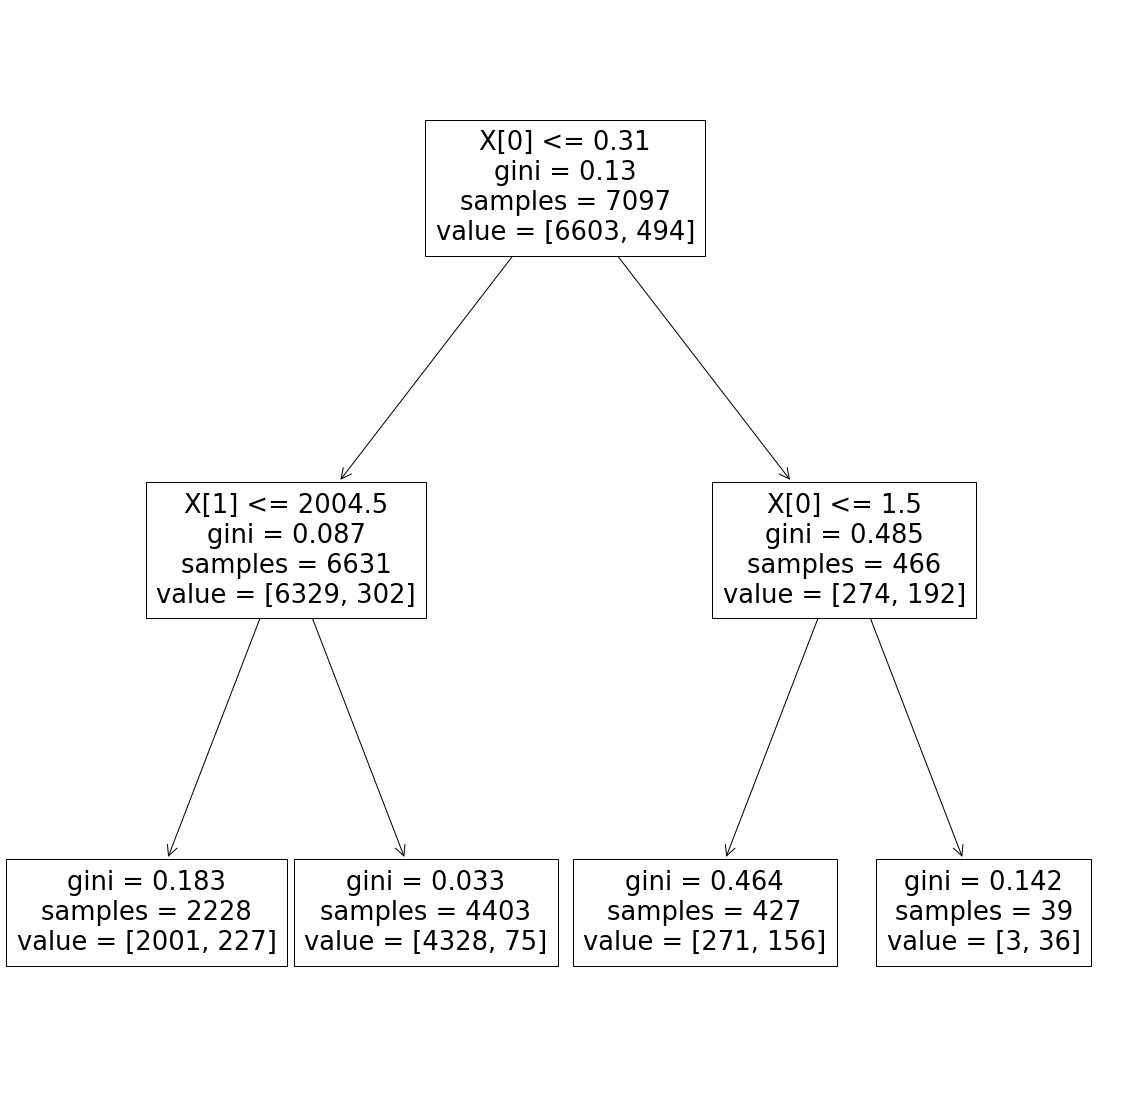

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth= 2).fit(X_train_num, y_train)
ind = range(0,7097)

plt.figure(figsize=(20,20))
tree.plot_tree(clf, fontsize=20)
tree.plot_tree(clf)

y_pred_tx_num = clf.predict(X_test_num)

In [ ]:
# Stacking Tree models
prediction_array_trees = []

for i, j in zip(y_pred_tx_num, y_pred_tx):
    if i == 0 and j == 0:
        prediction_array_trees.append(0)
    else:
        prediction_array_trees.append(1)
print(prediction_array_trees)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 

Accuracy: 0.9696796338672768
F1: 0.7180851063829786


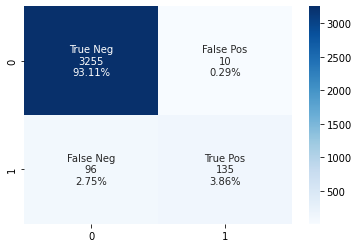

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_array_trees))
print("F1:",metrics.f1_score(y_test, y_pred_tx))
cf_matrix_TfText = confusion_matrix(y_test, y_pred_tx)

group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_TfText.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix_TfText.flatten()/np.sum(cf_matrix_TfText)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_TfText, annot=labels, fmt='', cmap='Blues');

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tx_num))
print("F1:",metrics.f1_score(y_test, y_pred_tx_num))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_names = [f"feature {i}" for i in range(X_train_num.shape[1])]
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(X_train_num, y_train)

predarr_num = clf.predict(X_test_num)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predarr_num))
print("F1:",metrics.f1_score(y_test, predarr_num))

In [ ]:
feature_names = [f"feature {i}" for i in range(count_train.shape[1])]
clf = RandomForestClassifier(max_depth=21, random_state=0)
clf.fit(count_train, y_train)

predarr = clf.predict(count_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predarr))
print("F1:",metrics.f1_score(y_test, predarr))

In [ ]:
# Stacking Random forest models
prediction_array_RFtrees = []

for i, j in zip(predarr_num, predarr):
    if i == 0 and j == 0:
        prediction_array_RFtrees.append(0)
    else:
        prediction_array_RFtrees.append(1)
print(prediction_array_RFtrees)

In [ ]:
# Stacked accuracy of trees
print("Accuracy:",metrics.accuracy_score(y_test, prediction_array_RFtrees))
print("F1:",metrics.f1_score(y_test, prediction_array_RFtrees))

In [ ]:
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
predictors = fake_job_postings[["ratio", "character_count"]]
predictor_importances = [(predictor, round(importance, 2)) for predictor, importance in zip(predictors, importances)]
# Sort the feature importances by most important first
predictor_importances = sorted(predictor_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in predictor_importances]

In [ ]:
metrics.f1_score(y_test, predarr)

In [ ]:
print(len(clf.estimators_))

[0.00000000e+00 2.78010817e-03 7.62431897e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0.         0.0116778  0.00075861 ... 0.         0.         0.        ]


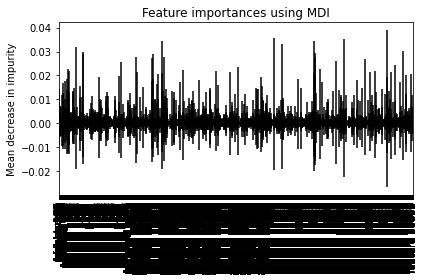

In [ ]:

import numpy as np


importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

print(importances)
print(std)


forest_importances = pd.Series(importances, index= feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()

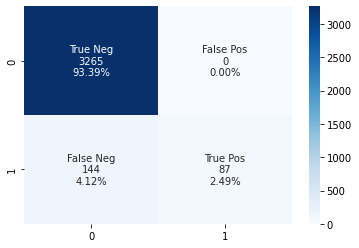

In [ ]:
# plotting the importances
cf_matrix_RFnum = confusion_matrix(y_test, predarr)

group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_RFnum.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix_RFnum.flatten()/np.sum(cf_matrix_RFnum)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_RFnum, annot=labels, fmt='', cmap='Blues');

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz



In [ ]:
print(clf.estimators_[0])

DecisionTreeClassifier(max_depth=21, max_features='auto',
                       random_state=209652396)


In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
import six
import os 
from IPython.display import Image
from subprocess import call



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predarr))

Accuracy: 0.9588100686498856


In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(count_train, y_train)

predarr = clf.predict(count_test)
print("Accuracy:",metrics.accuracy_score(y_test, predarr))

Accuracy: 0.9399313501144165


In [ ]:
# looping through different depths and appending accuracy
forestacc = []
for i in range(1,10): 
  clf = RandomForestClassifier(max_depth=i, random_state=0)
  clf.fit(count_train, y_train)
  predarr = clf.predict(count_test)
  forestacc.append(metrics.accuracy_score(y_test, predarr))

In [ ]:
# textarr = count_vectorizer.get_feature_names()

In [ ]:
# importances = list(clf.feature_importances_)
# # List of tuples with variable and importance
# predictors = fake_job_postings[["text"]] 
# predictor_importances = [(predictor, round(importance, 2)) for predictor, importance in zip(predictors, importances)]
# # Sort the feature importances by most important first
# predictor_importances = sorted(predictor_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in predictor_importances]

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predarr))

Accuracy: 0.9385011441647597


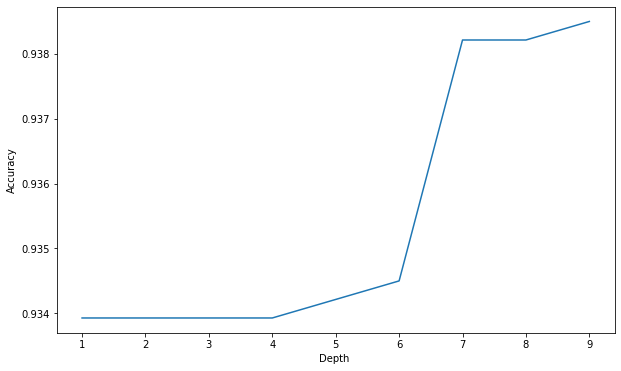

In [ ]:
loc = np.arange(1,10,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,10), forestacc)
plt.xticks(loc)
plt.xlabel('Depth ')
plt.ylabel('Accuracy')
plt.show()